In [2]:
#Admission in college Practice

In [ ]:
D:\ineuron\MachineLearningFiles\ML1\Linear Regression\LinearRegression-master\LinearRegressionTillCloud\Admission_Prediction.csv

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [5]:
df=pd.read_csv("D:\ineuron\MachineLearningFiles\ML1\Linear Regression\LinearRegression-master\LinearRegressionTillCloud\Admission_Prediction.csv")
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
df.size

4500

In [8]:
df.info

<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0             1      337.0        118.0                4.0  4.5  4.5  9.65   
1             2      324.0        107.0                4.0  4.0  4.5  8.87   
2             3        NaN        104.0                3.0  3.0  3.5  8.00   
3             4      322.0        110.0                3.0  3.5  2.5  8.67   
4             5      314.0        103.0                2.0  2.0  3.0  8.21   
..          ...        ...          ...                ...  ...  ...   ...   
495         496      332.0        108.0                5.0  4.5  4.0  9.02   
496         497      337.0        117.0                5.0  5.0  5.0  9.87   
497         498      330.0        120.0                5.0  4.5  5.0  9.56   
498         499      312.0        103.0                4.0  4.0  5.0  8.43   
499         500      327.0        113.0                4.0  4.5  4.5  9.04   

     Research  Chance of Admit 

In [9]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [10]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
df["GRE Score"].mode()[0]

312.0

In [14]:
df["GRE Score"].fillna(df["GRE Score"].mode()[0],inplace=True)

In [15]:
df["GRE Score"].isna().sum()

0

In [16]:
df["TOEFL Score"].mode()

0    110.0
dtype: float64

In [17]:
df["TOEFL Score"].fillna(df["TOEFL Score"].mode()[0],inplace=True)

In [18]:
df["TOEFL Score"].isna().sum()

0

In [19]:
df["University Rating"].fillna(df["University Rating"].mean(),inplace=True)

In [21]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [22]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,312.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [23]:
#Selecting the dependent and independent variable

x=df.drop(columns=["Chance of Admit","Serial No."],axis=1)
y=df["Chance of Admit"]

In [24]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [39]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

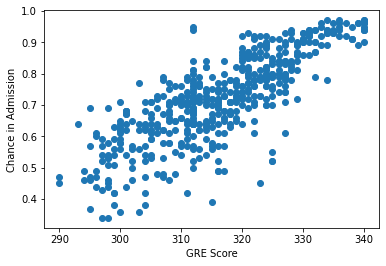

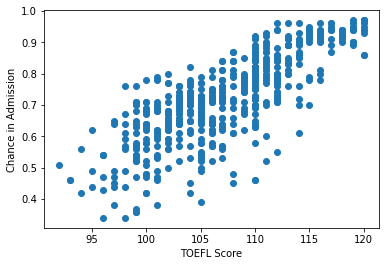

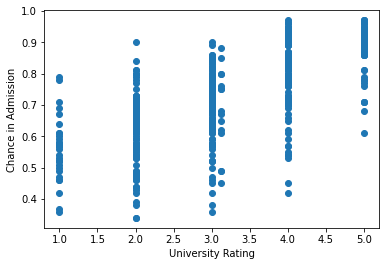

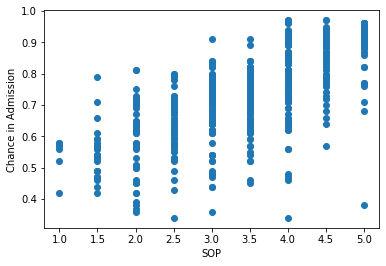

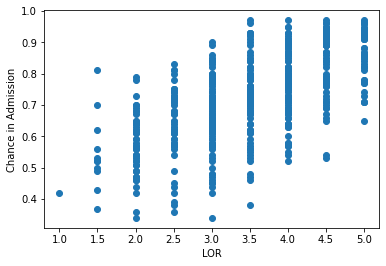

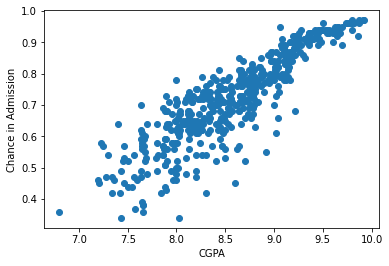

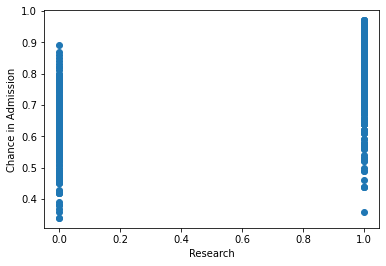

In [25]:
#Relationship between features and target variable
for col in x.columns:
    if(col!=["Chance of Admit"]):
        plt.scatter(x[col],y)
        plt.xlabel(col)
        plt.ylabel("Chance in Admission")
        plt.show()

In [26]:
#Scalling the data
from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
scaler_label=StandardScaler()
scaled_data=scaler_feature.fit_transform(x)
scaled_data

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [27]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [28]:
scaled_data[0]

array([1.85052822, 1.77547686, 0.77890565, 1.13735981, 1.09894429,
       1.77680627, 0.88640526])

In [29]:
type(scaled_data)

numpy.ndarray

In [32]:
#Splitting the data into test and training dataset
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)

In [36]:
train_x.shape

(335, 7)

In [37]:
train_y.shape

(335,)

In [39]:
test_x.shape

(165, 7)

In [40]:
test_y.shape

(165,)

In [43]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [47]:
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

0.8076993525686706

In [48]:
test_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
69,328.0,115.0,4.0,4.5,4.0,9.16,1
29,310.0,99.0,2.0,1.5,2.0,7.30,0
471,311.0,103.0,3.0,2.0,4.0,8.09,0
344,295.0,96.0,2.0,1.5,2.0,7.34,0
54,322.0,110.0,3.0,3.0,3.5,8.00,0
...,...,...,...,...,...,...,...
5,330.0,115.0,5.0,4.5,3.0,9.34,1
269,308.0,110.0,4.0,4.5,5.0,8.34,0
267,314.0,107.0,3.0,3.0,3.5,8.17,1
456,299.0,100.0,2.0,2.0,2.0,7.88,0


In [50]:
#Pass value of x to predit y
reg.predict(test_x)

array([0.85868396, 0.47100161, 0.6280096 , 0.44578053, 0.64598598,
       0.85398867, 0.58423805, 0.6708053 , 0.81576593, 0.68391898,
       0.66322789, 0.60710496, 0.89390747, 0.76122405, 0.63653857,
       0.50101692, 0.5932031 , 0.74550918, 0.56026094, 0.71477719,
       0.89825968, 0.60985982, 0.85096431, 0.82326697, 0.99808338,
       0.60354515, 0.68321824, 0.93662411, 0.87713203, 0.70043558,
       0.78420399, 0.85380635, 0.7502154 , 0.55268936, 0.73961435,
       0.78262859, 0.79567973, 0.57756558, 0.54007331, 0.70184561,
       0.94815906, 0.58454502, 0.83942492, 0.78608391, 0.8110905 ,
       0.54729563, 0.59557674, 0.87410501, 0.95154098, 0.59880994,
       0.81659257, 0.70920574, 0.80814867, 0.99084397, 0.64359316,
       0.85476613, 0.6179743 , 0.89711609, 0.76941624, 0.73447114,
       0.68813814, 0.62390397, 0.47604256, 0.8832669 , 0.64759615,
       0.68476495, 0.70437717, 0.45943371, 0.84033595, 0.84308359,
       0.92763891, 0.77439541, 0.65730255, 0.83786836, 0.64625

In [52]:
test_y.head(10)

69     0.78
29     0.54
471    0.64
344    0.47
54     0.70
189    0.88
463    0.57
184    0.72
140    0.84
125    0.64
Name: Chance of Admit, dtype: float64

In [53]:
train_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
221,316.0,110.0,3.121649,3.5,4.0,8.56,0
435,309.0,105.0,2.000000,2.5,4.0,7.68,0
335,325.0,111.0,4.000000,4.0,4.5,9.11,1
476,304.0,104.0,3.000000,2.5,2.0,8.12,0
80,312.0,105.0,3.000000,2.0,3.0,8.02,1
...,...,...,...,...,...,...,...
343,305.0,103.0,2.000000,2.5,3.5,8.13,0
359,321.0,107.0,2.000000,2.0,1.5,8.44,0
323,305.0,102.0,2.000000,2.0,2.5,8.18,0
280,311.0,102.0,3.000000,4.5,4.0,8.64,1


In [59]:
reg.predict([[300,100,4,5,4,8.08,1]])

array([0.62897035])

In [60]:
#Saving the file in local
filename="MyPracticeLnRegResult.pickle"
pickle.dump(reg,open(filename,"wb"))

In [61]:
#Predicting from the saved Model
load_model=pickle.load(open(filename,"rb"))
a=load_model.predict([[300,100,4,5,4,8.08,1]])
a

array([0.62897035])